# Gold Recovery Data Analysis and Model Building

In this project, we aim to analyze and preprocess gold recovery data, identify key features, and build predictive models to estimate gold recovery rates. The data is stored in three files: `gold_recovery_train.csv`, `gold_recovery_test.csv`, and `gold_recovery_full.csv`. Our goal is to ensure data correctness, handle missing values, and build accurate models using cross-validation.

## Initialization

In [1]:

# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

## Load data

In [2]:
# Load the data files into different DataFrames
try:
    full_df= pd.read_csv('gold_recovery_full.csv')
except:
    full_df = pd.read_csv('datasets/gold_recovery_full.csv')

full_df.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [3]:
# Load the data files into different DataFrames
try:
    test_df= pd.read_csv('gold_recovery_test.csv')
except:
    test_df = pd.read_csv('datasets/gold_recovery_test.csv')

test_df.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [4]:
# Load the data files into different DataFrames
try:
    train_df= pd.read_csv('gold_recovery_train.csv')
except:
    train_df = pd.read_csv('datasets/gold_recovery_train.csv')

train_df.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


## EDA

In [5]:
dfs= {'train_df' : train_df, 'test_df' : test_df, 'full_df' : full_df}

for name, df in dfs.items():
    print(name)
    print(df.info())
    print("\n" + "-"*100 + "\n")


train_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null 

We Have so many nulls in this data that we would need to deal with them when

In [6]:
# Dealing with other all nulls
for col in train_df.columns[1:]:
    if col not in  ['date' , 'rougher.output.recovery', 'final.output.recovery']: 
        med =  train_df[col].median()
        train_df[col] = train_df[col].fillna(med)  
        med =  full_df[col].median()
        full_df[col] = full_df[col].fillna(med) 
         
for col in test_df.columns[1:]:
    med =  test_df[col].median()
    test_df[col] = test_df[col].fillna(med) 
    
train_df.isna().sum()


date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [7]:
def calculate_recovery(concentrate, feed, tailings):
    # Avoid division by zero
    if (feed * (concentrate - tailings)) == 0:
        return 0
    recovery = (concentrate * (feed - tailings)) / (feed * (concentrate - tailings)) * 100
    return recovery

# Calculate recovery for rougher
full_df['rougher_recovery_calculated'] = full_df.apply(
    lambda row: calculate_recovery(row['rougher.output.concentrate_au'], row['rougher.input.feed_au'], row['rougher.output.tail_au']),
    axis=1
)


# Check the difference 
full_df[['rougher.output.recovery', 'rougher_recovery_calculated']].describe()


,rougher.output.recovery,rougher_recovery_calculated
count,19597.000000,22716.000000
mean,83.078122,42.652958
std,14.661880,2660.919319
min,0.000000,-366924.161290
25%,80.941306,79.306751
50%,86.144121,85.657399
75%,89.987561,90.053574
max,100.000000,13802.071756


In [8]:
# checking mean squared error between the actual recovery and the calculated one 
print('Mean Squared Error: ', mean_squared_error(full_df['rougher.output.recovery'].fillna(0), full_df['rougher_recovery_calculated'].fillna(0)))

Mean Squared Error:  7075859.449322066


In [9]:
print('Mean Absolute Error: ', mean_absolute_error(full_df['rougher.output.recovery'].fillna(0), full_df['rougher_recovery_calculated'].fillna(0)))

Mean Absolute Error:  43.84472903076323


That's a huge diffrence so we wouldn't be able to depend on the calculated data, but we are going to do more study to check if the data we have would be good enough or not 

In [10]:
full_df[(full_df['rougher_recovery_calculated']> 100)|( full_df['rougher_recovery_calculated']< 0) ][['rougher.output.recovery', 
                                                                                                    'rougher_recovery_calculated']].describe()

,rougher.output.recovery,rougher_recovery_calculated
count,0.0,345.000000
mean,NaN,-2215.660042
std,NaN,21501.215360
min,NaN,-366924.161290
25%,NaN,-1.498298
50%,NaN,-0.061871
75%,NaN,112.780613
max,NaN,13802.071756


From this, we can tell that the reason that cause all the outliers so we would drop these columns for sure. let us check the other columns to see if we we are going to leave them or not 

In [11]:
diff = full_df[full_df['rougher.output.recovery'].isna()][['rougher.output.recovery', 'rougher_recovery_calculated']]                                                                                          
diff[(diff['rougher_recovery_calculated']<= 100)&( diff['rougher_recovery_calculated'] >= 0) ][['rougher.output.recovery', 
                                                                                                    'rougher_recovery_calculated']].describe()

,rougher.output.recovery,rougher_recovery_calculated
count,0.0,2774.000000
mean,NaN,37.932710
std,NaN,44.926941
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,90.010274
max,NaN,100.000000


Most of the predictable null values are 0, likely due to division by zero errors. Since 0 isn't a good representation and suggests mistakes in other calculations, the best approach is to delete these null values.

In [12]:
full_df = full_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
train_df = train_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

In [15]:
print('Mean Squared Error: ', mean_squared_error(full_df['rougher.output.recovery'].fillna(0), full_df['rougher_recovery_calculated'].fillna(0)))

Mean Squared Error:  2.20602868292621e-28


In [16]:
print('Mean Absolute Error: ', mean_absolute_error(full_df['rougher.output.recovery'].fillna(0), full_df['rougher_recovery_calculated'].fillna(0)))

Mean Absolute Error:  9.859972981782362e-15


After dropping all nulls, We found that our calculation is the same with the orginal values, which validate both of them and let us move on exploring the data

/tmp/ipykernel_32/199705645.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'])


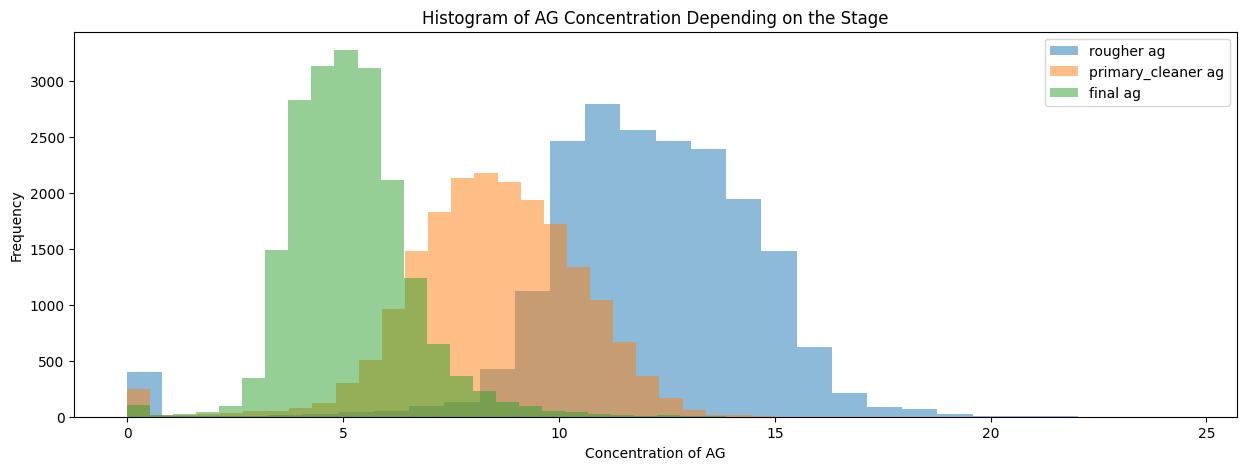

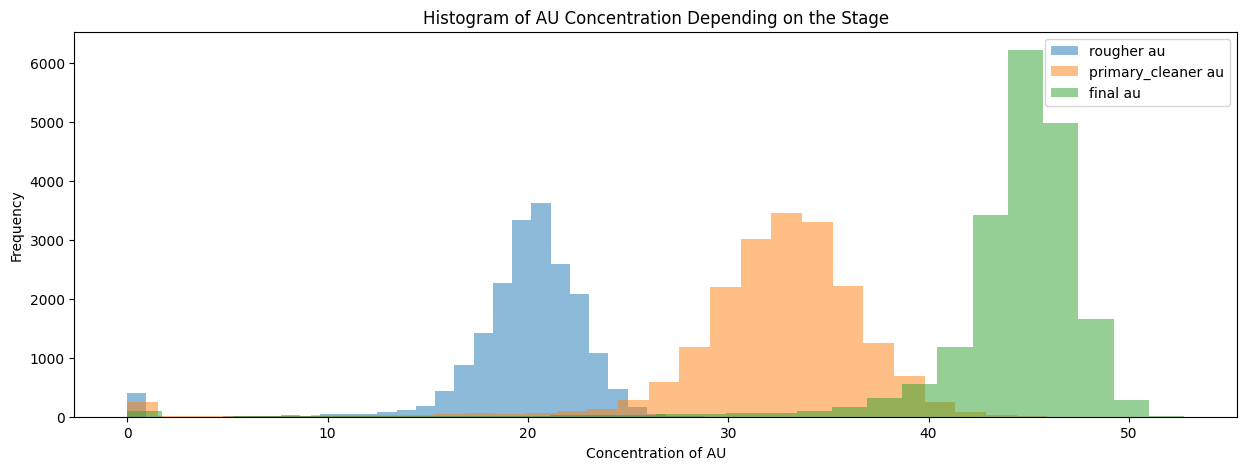

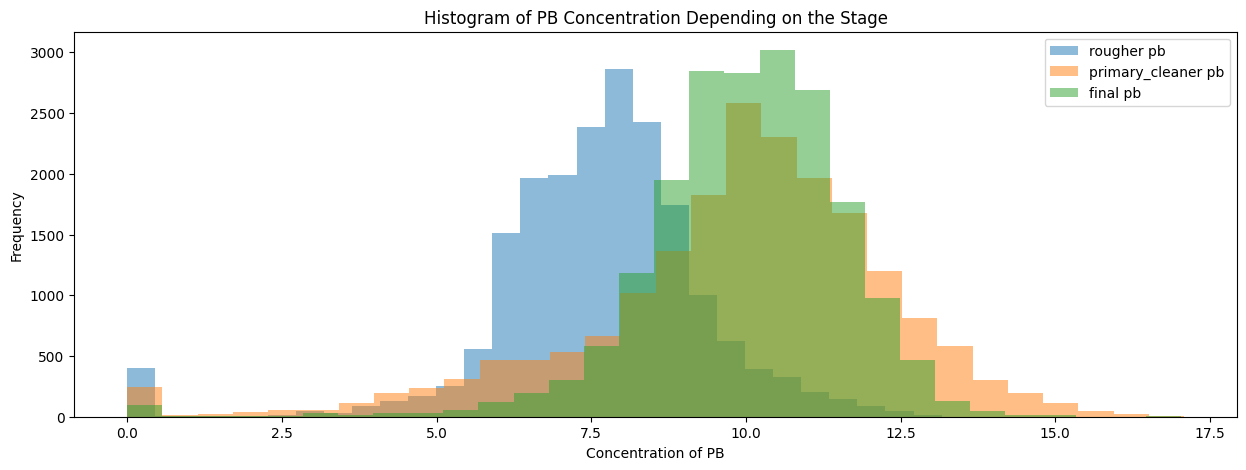

In [12]:
# Extract relevant columns
stages = ['rougher', 'primary_cleaner', 'final']
metals = ['ag', 'au', 'pb']
columns = [f'{stage}.output.concentrate_{metal}' for stage in stages for metal in metals]

# Filter the data to include only the relevant columns
data_filtered = full_df[['date'] + columns]

# Convert date column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'])

# Plot histograms for each metal separately
for metal in metals:
    plt.figure(figsize=(15, 5))
    for stage in stages:
        plt.hist(data_filtered[f'{stage}.output.concentrate_{metal}'].dropna(), bins=30, alpha=0.5, label=f'{stage} {metal}')
    plt.xlabel(f'Concentration of {metal.upper()}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {metal.upper()} Concentration Depending on the Stage')
    plt.legend()
    plt.show()


The graphs show that the Au concentration keeps increasing through the stages. It starts lower in the filtration stage and gets higher by the final stage. The other ingredients go up and down during the process.

/tmp/ipykernel_32/3282883236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['total_feed'] = full_df[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol',
/tmp/ipykernel_32/3282883236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['total_rougher_concentrate'] = full_df[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
/tmp/ipykernel_32/3282883236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


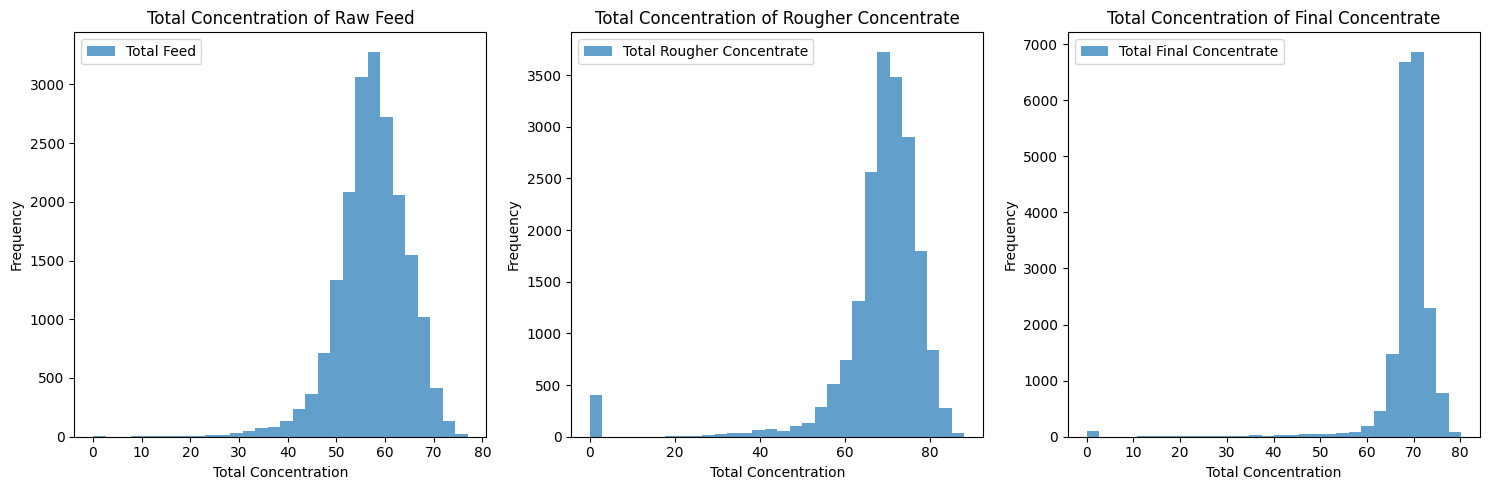

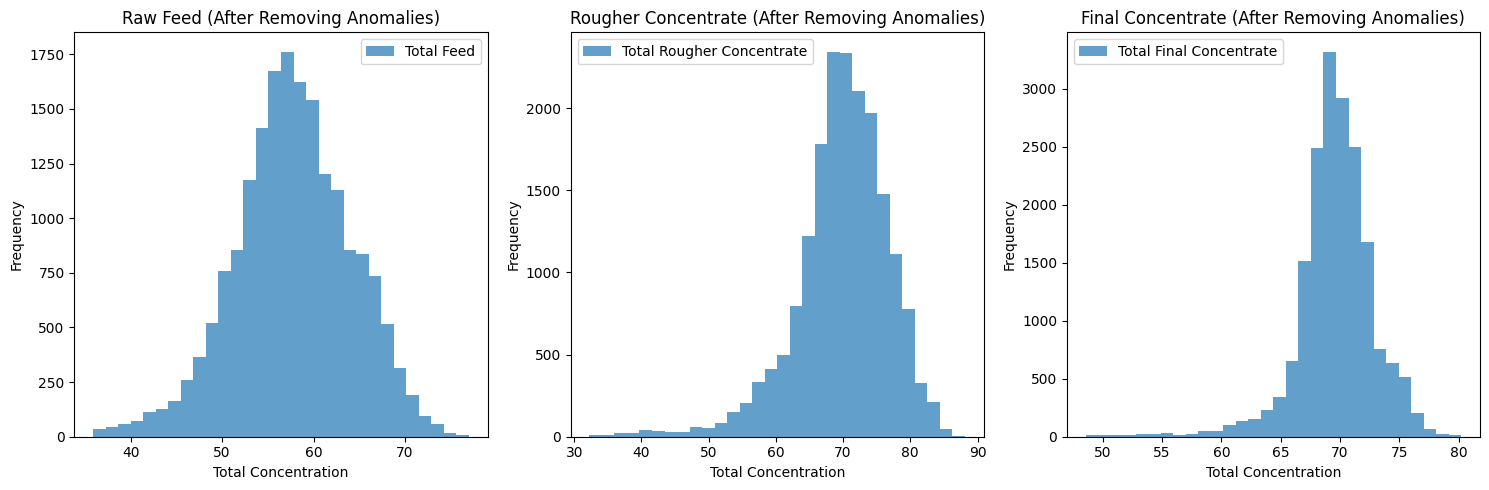

In [13]:
# Calculate total concentrations at different stages
full_df['total_feed'] = full_df[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 
                                 'rougher.input.feed_au']].sum(axis=1)
full_df['total_rougher_concentrate'] = full_df[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                                                'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)
full_df['total_final_concentrate'] = full_df[['final.output.concentrate_ag', 'final.output.concentrate_pb', 
                                              'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

# Plot the total concentrations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(full_df['total_feed'].dropna(), bins=30, alpha=0.7, label='Total Feed')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.title('Total Concentration of Raw Feed')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(full_df['total_rougher_concentrate'].dropna(), bins=30, alpha=0.7, label='Total Rougher Concentrate')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.title('Total Concentration of Rougher Concentrate')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(full_df['total_final_concentrate'].dropna(), bins=30, alpha=0.7, label='Total Final Concentrate')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.title('Total Concentration of Final Concentrate')
plt.legend()

plt.tight_layout()
plt.show()

# Identify and remove anomalies
threshold = 3  # Define a threshold for anomaly detection (e.g., 3 standard deviations)
for column in ['total_feed', 'total_rougher_concentrate', 'total_final_concentrate']:
    mean = full_df[column].mean()
    std = full_df[column].std()
    anomalies = full_df[(full_df[column] < mean - threshold * std) | (full_df[column] > mean + threshold * std)]
    full_df = full_df[~full_df.index.isin(anomalies.index)]

# Plot the total concentrations after removing anomalies
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(full_df['total_feed'].dropna(), bins=30, alpha=0.7, label='Total Feed')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.title('Raw Feed (After Removing Anomalies)')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(full_df['total_rougher_concentrate'].dropna(), bins=30, alpha=0.7, label='Total Rougher Concentrate')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.title('Rougher Concentrate (After Removing Anomalies)')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(full_df['total_final_concentrate'].dropna(), bins=30, alpha=0.7, label='Total Final Concentrate')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.title('Final Concentrate (After Removing Anomalies)')
plt.legend()

plt.tight_layout()
plt.show()


This graph tells us a few things:  
- Anomalies don’t affect the concentration of our feed or output.  
- There’s significant waste, as a large amount of feed contains no valuable metals.  
- As expected, the concentration generally increases as the process continues.

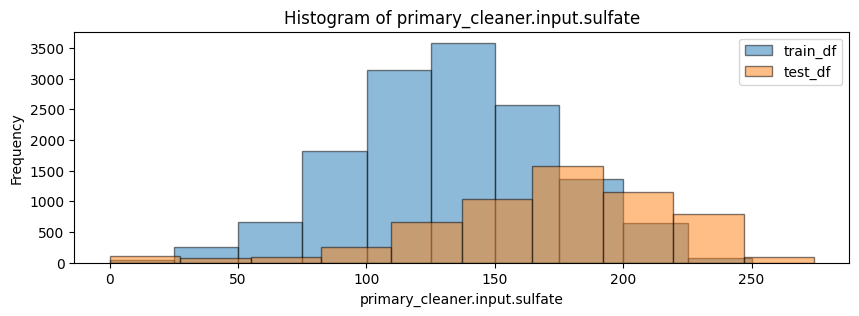

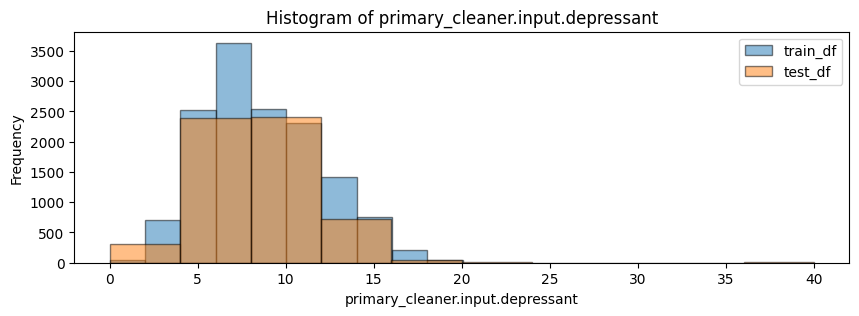

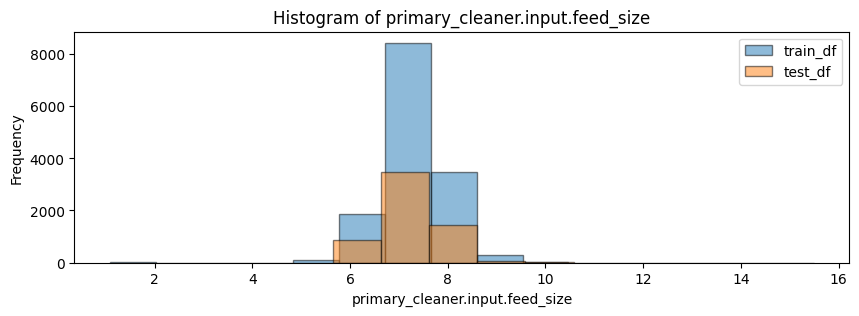

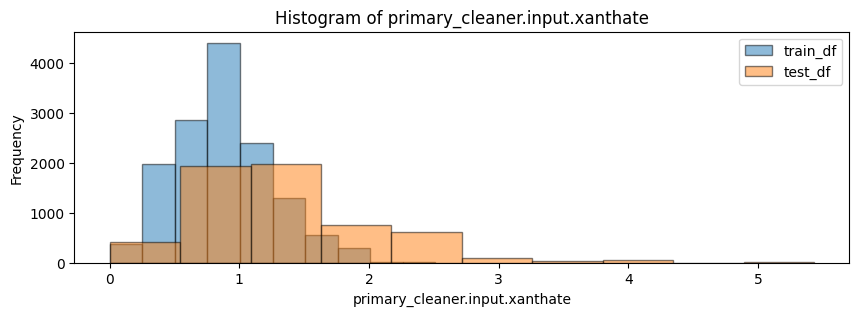

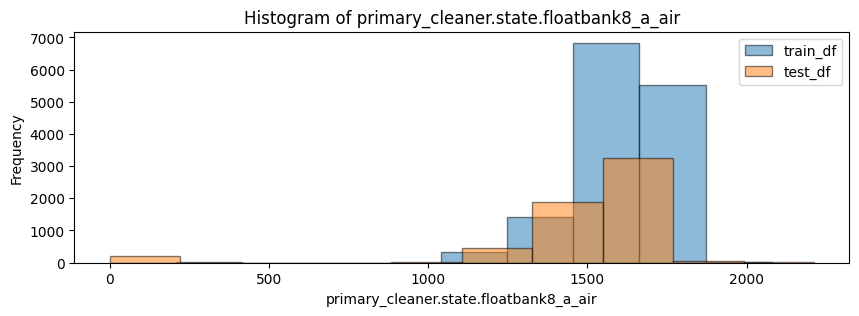

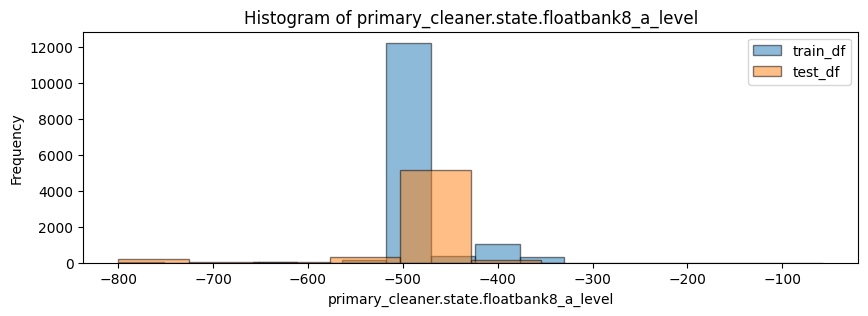

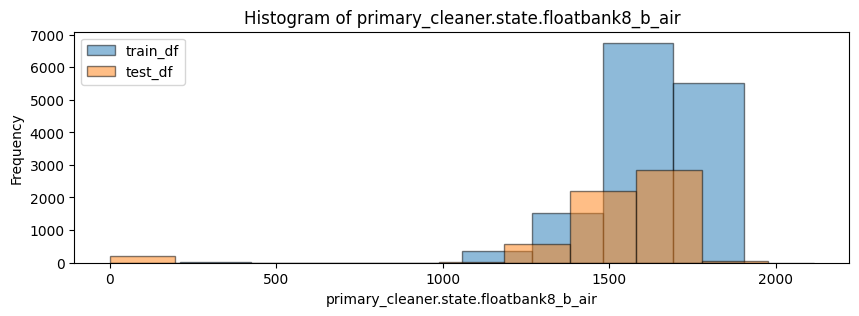

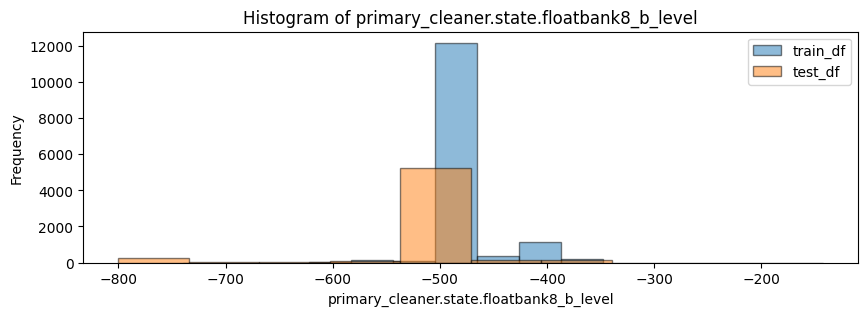

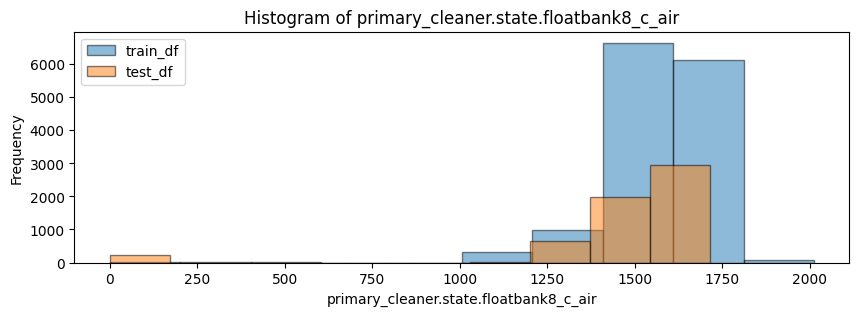

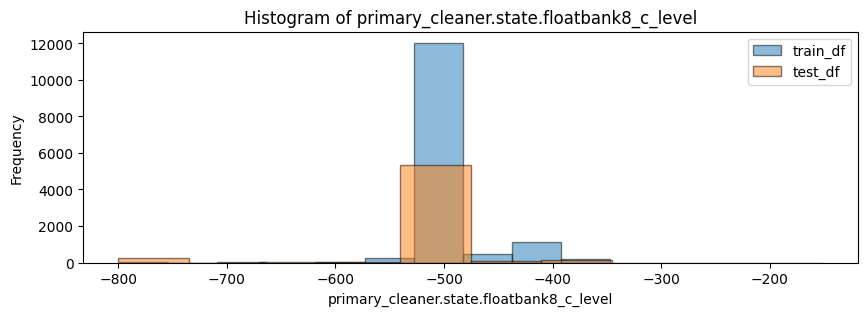

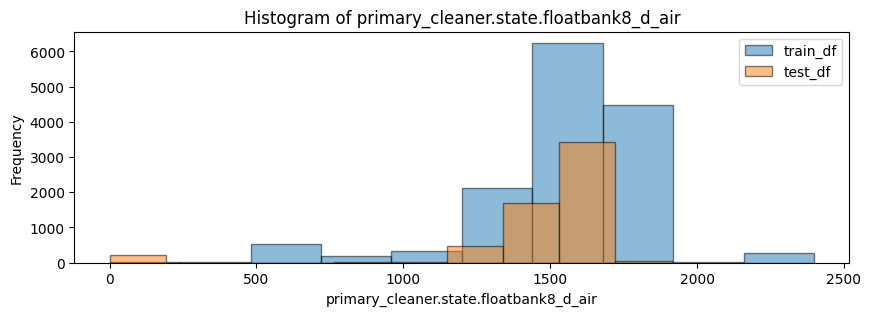

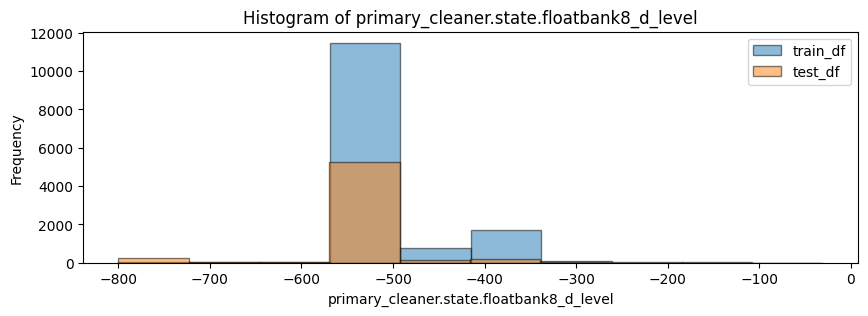

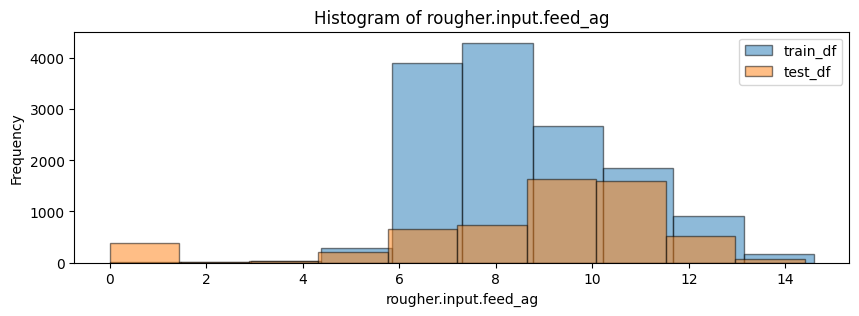

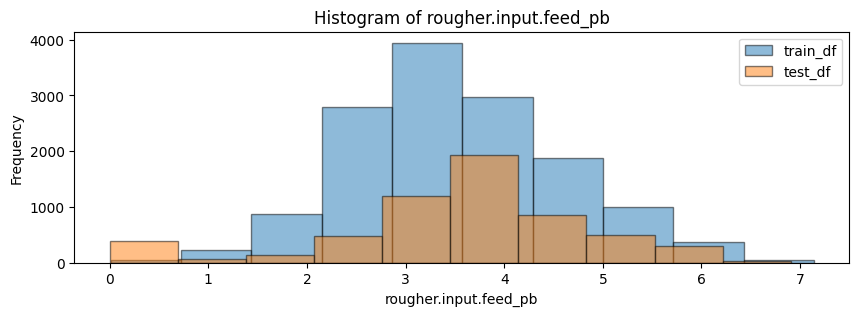

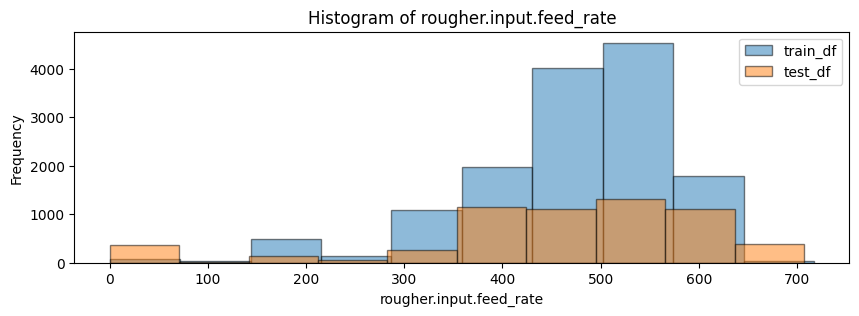

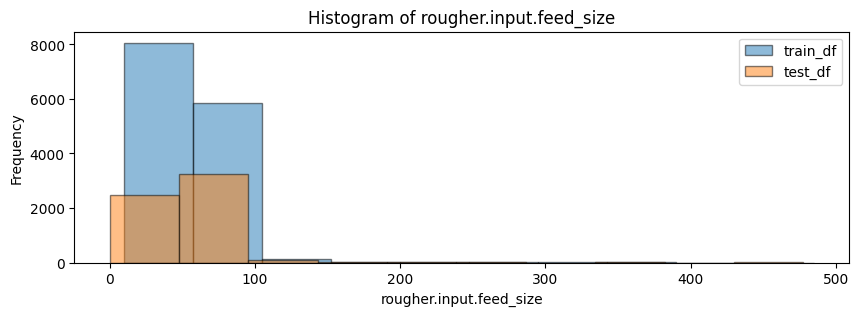

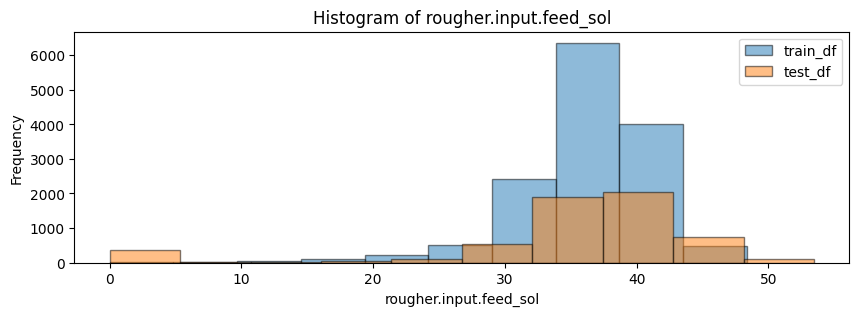

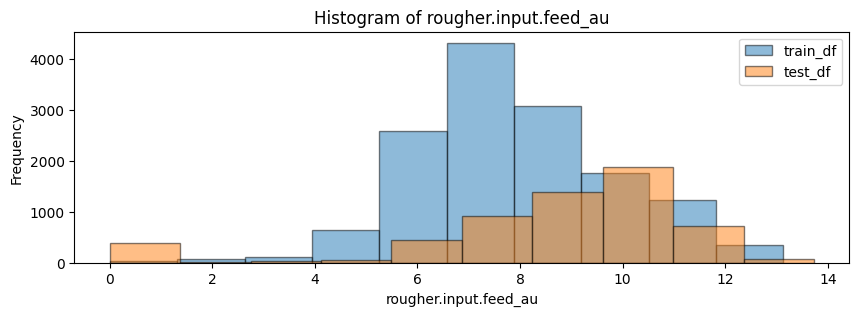

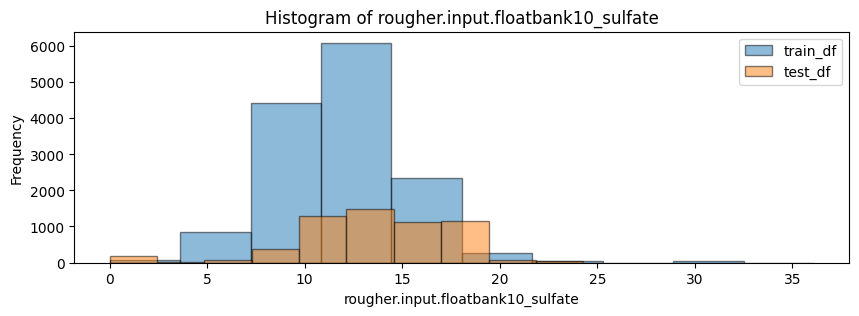

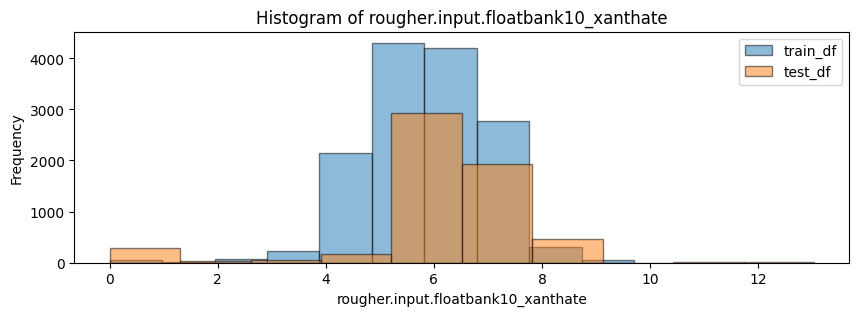

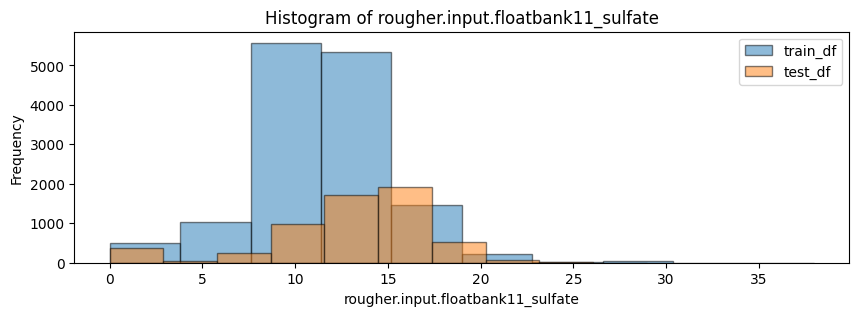

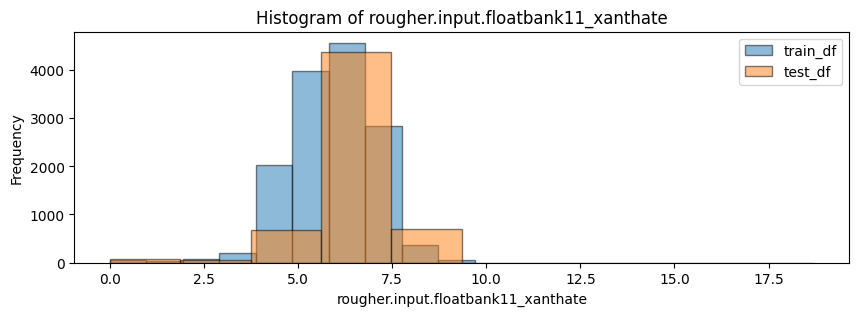

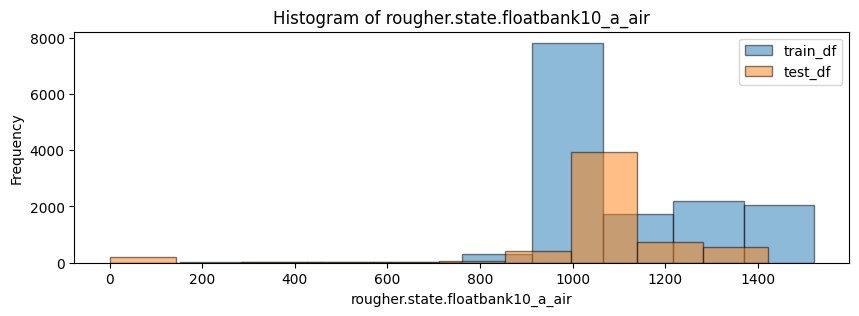

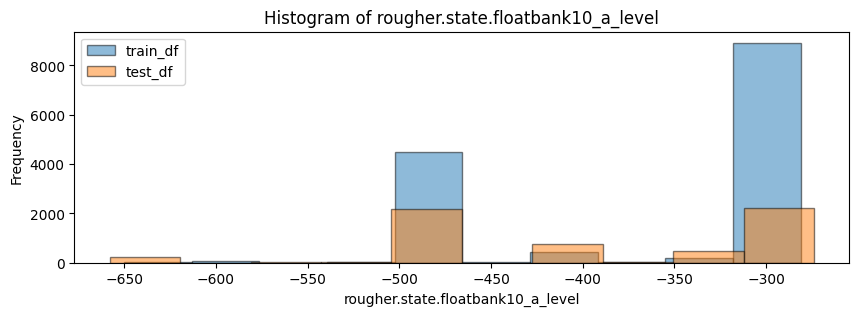

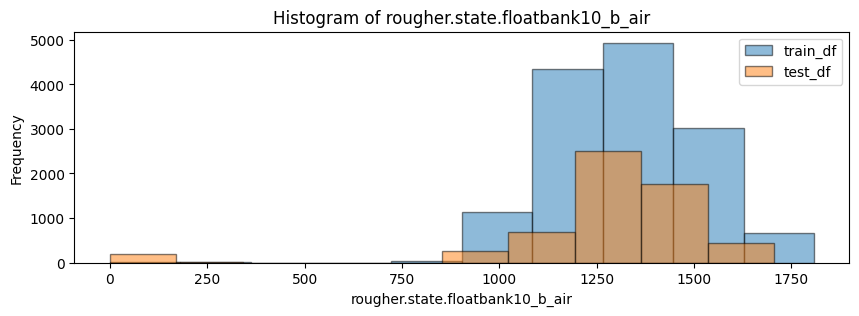

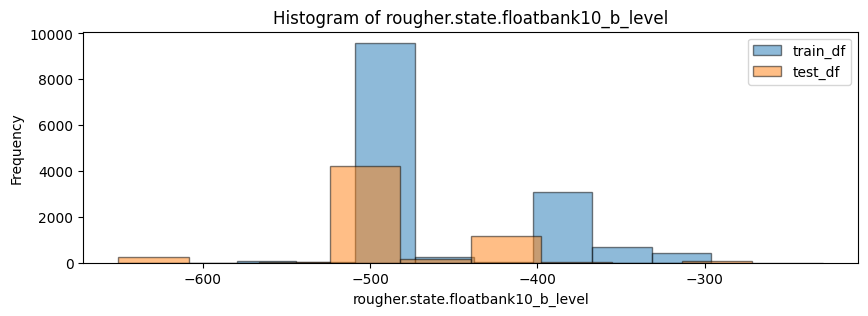

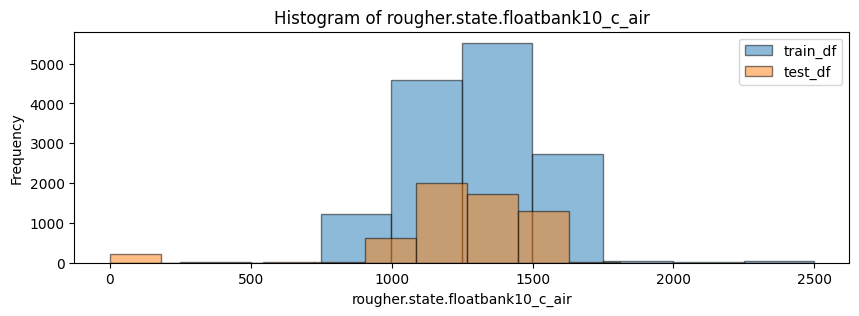

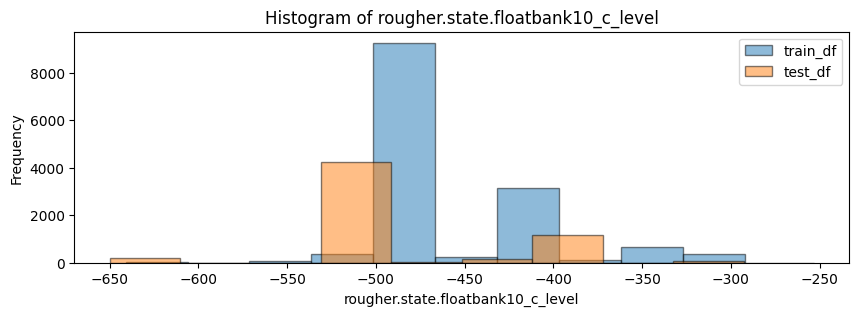

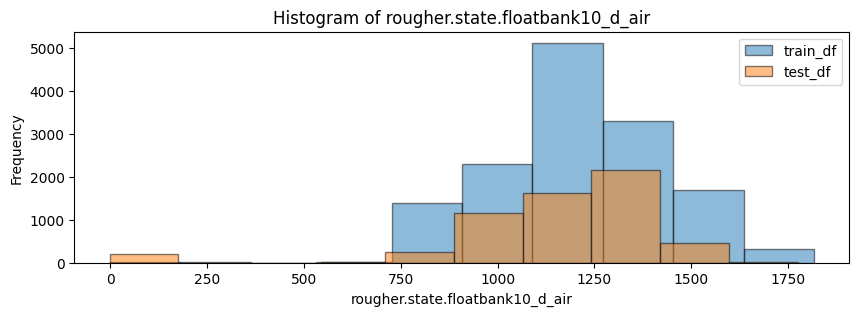

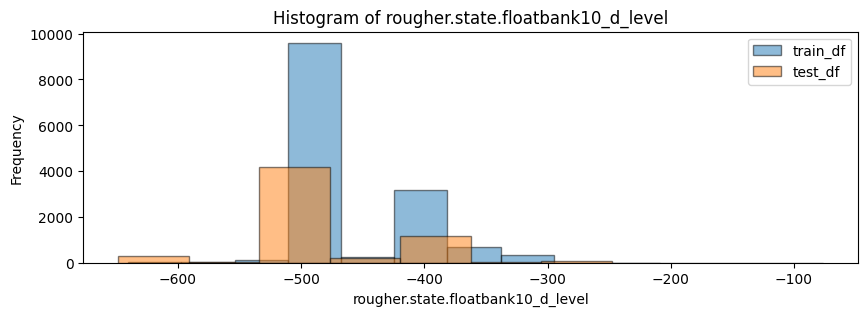

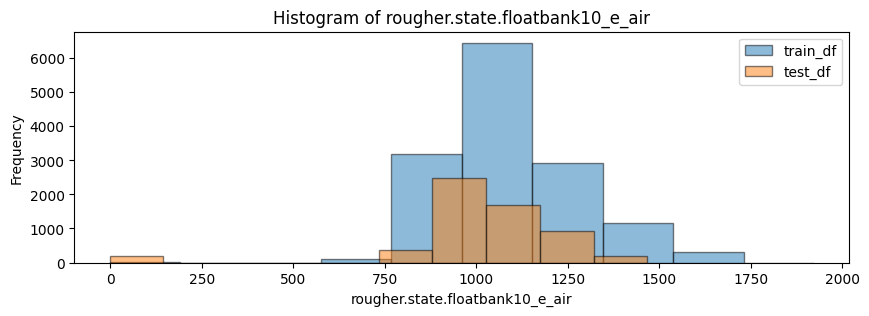

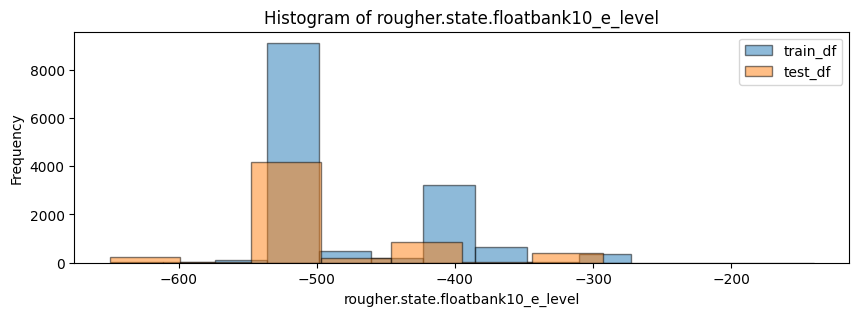

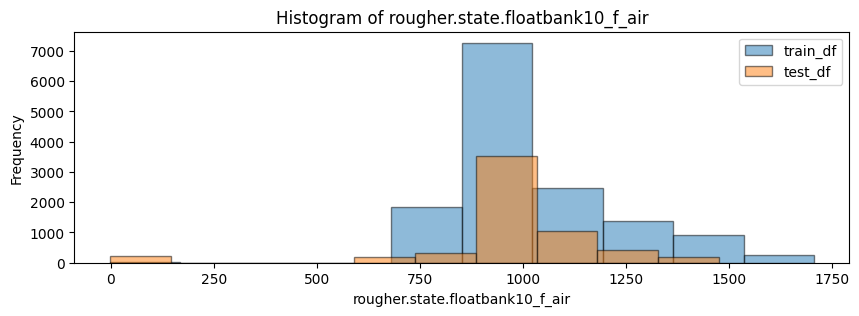

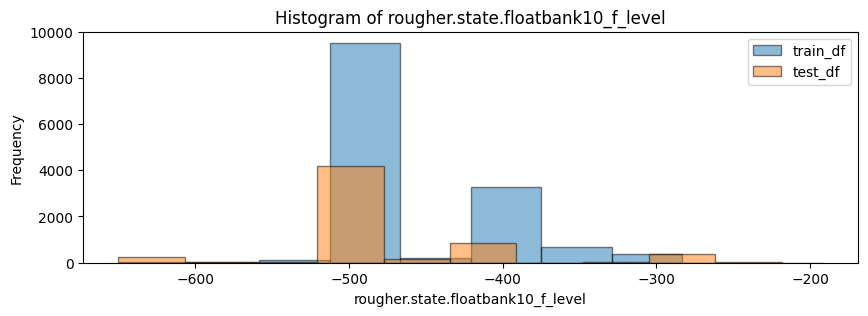

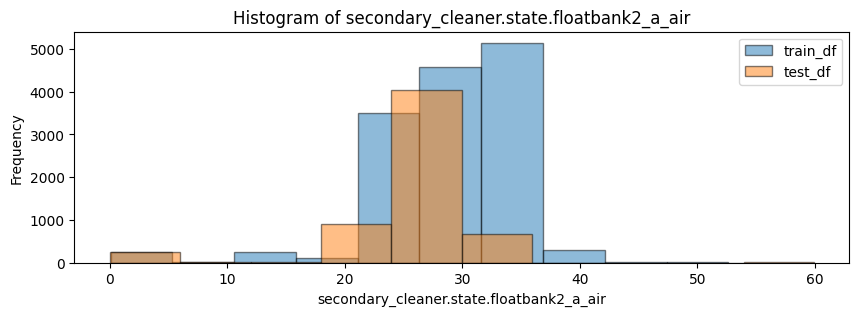

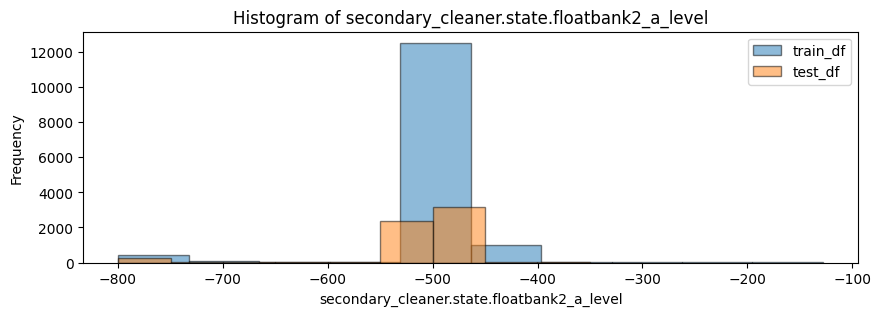

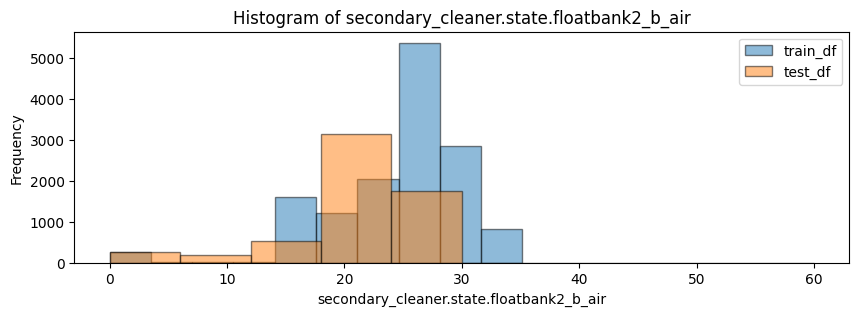

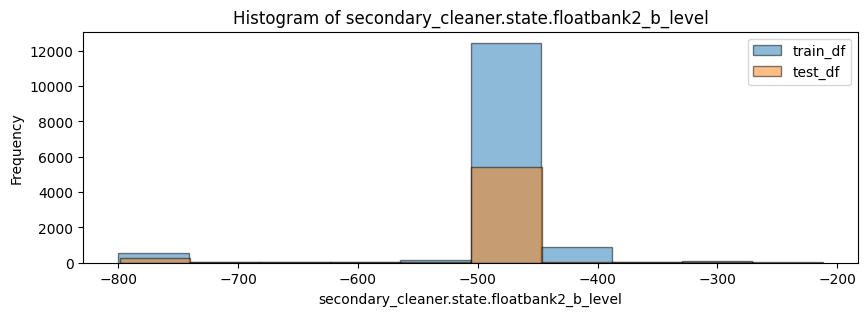

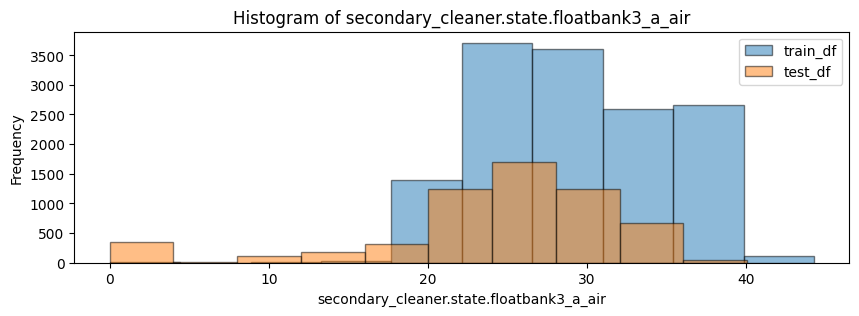

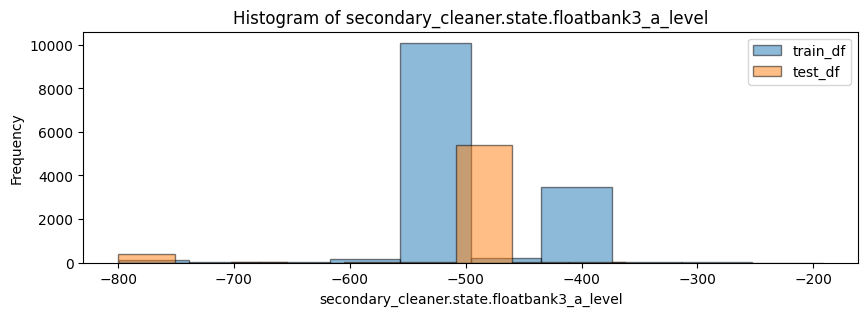

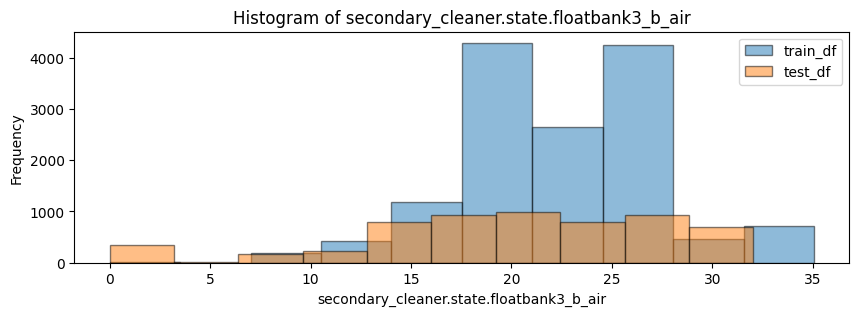

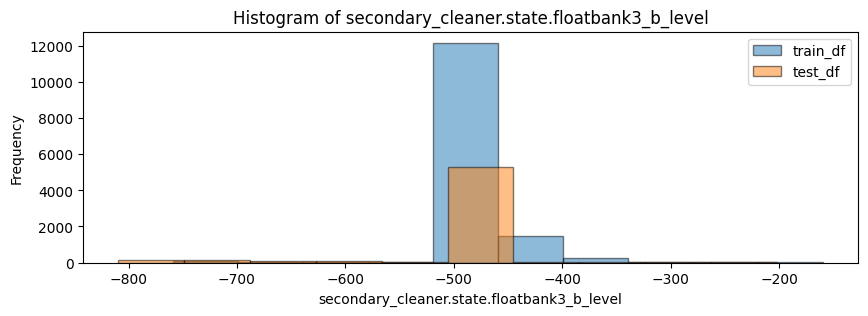

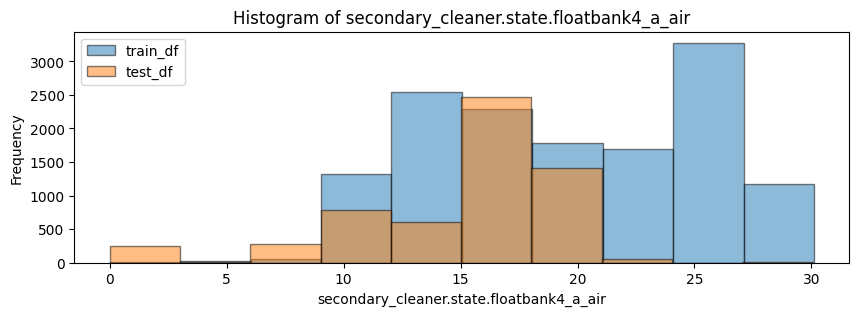

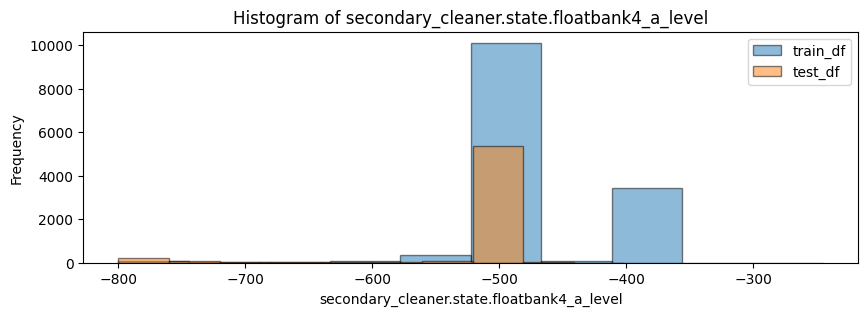

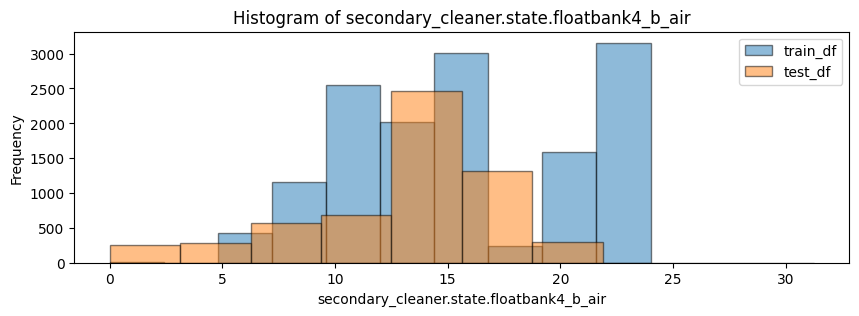

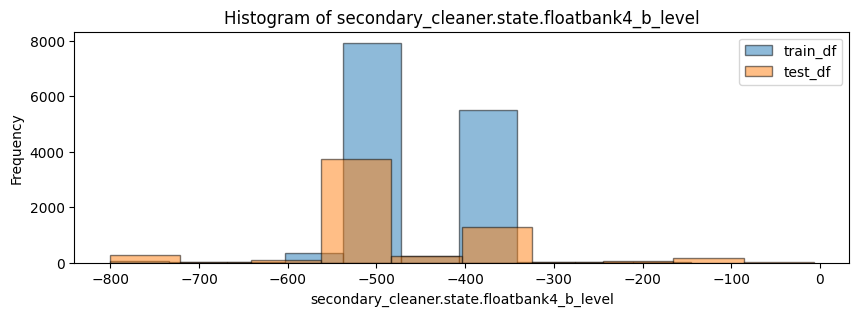

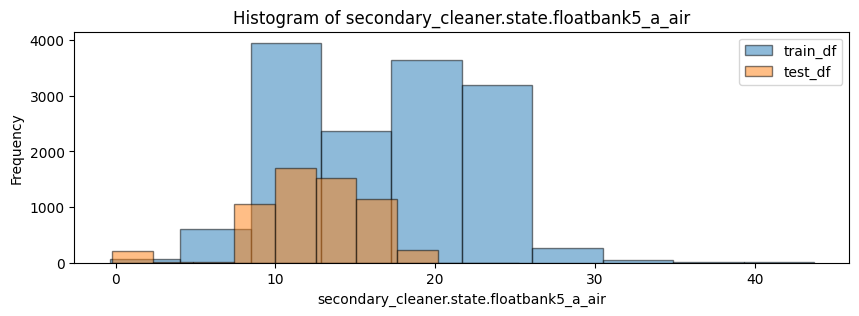

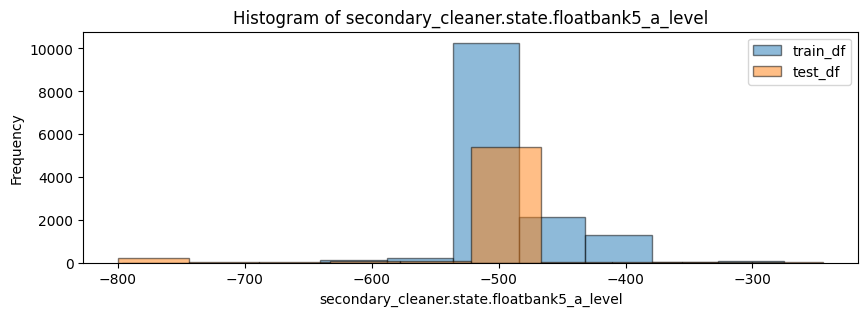

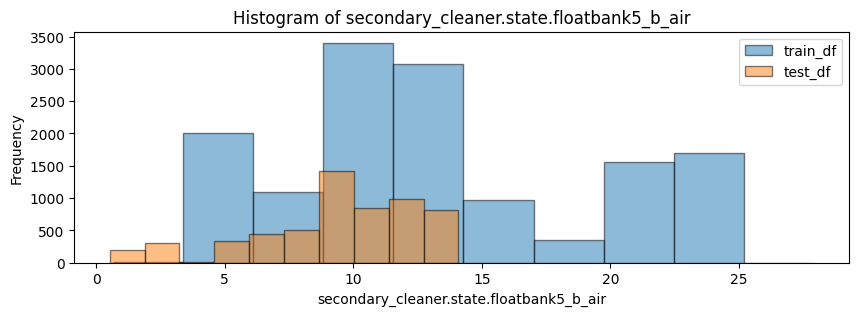

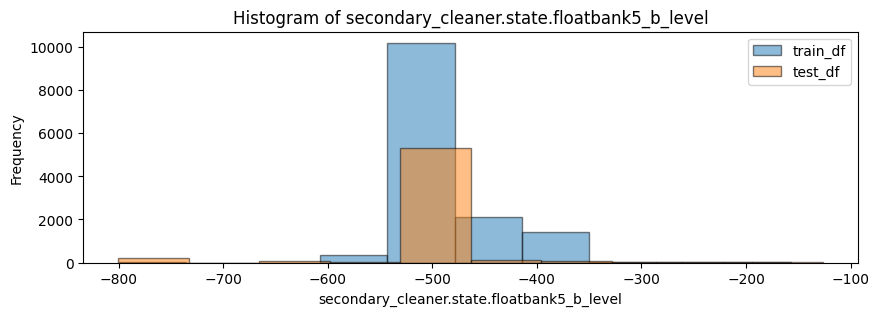

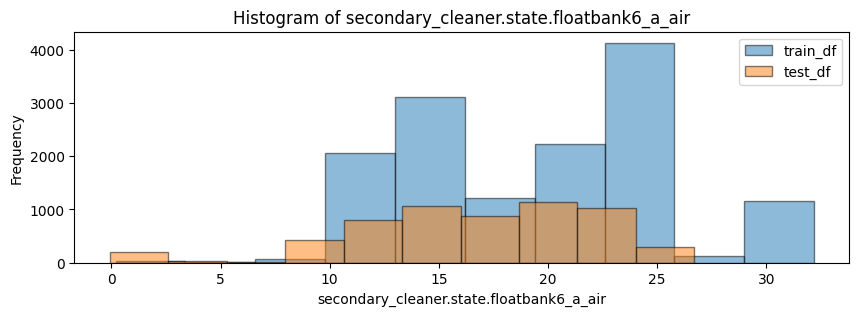

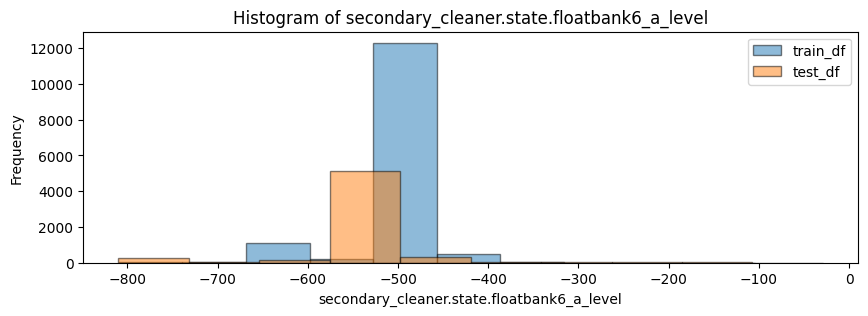

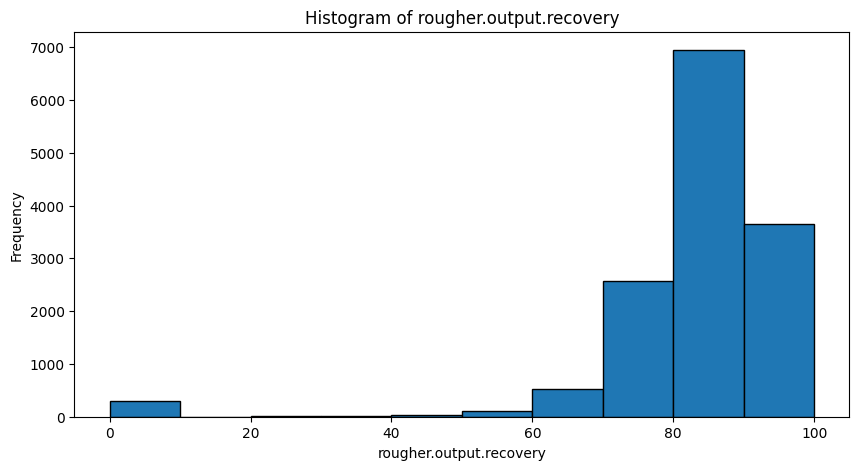

In [14]:
dfs_2= {'train_df' : train_df, 'test_df' : test_df}

for column in train_df.columns:
    if column in test_df.columns[1:]:
        plt.figure(figsize=(10, 3))
        for name, df in dfs_2.items():
            df[column].hist(alpha=0.5, label=name, edgecolor='black', grid=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# Ploting our target in the training data set  C
plt.figure(figsize=(10, 5))
train_df['rougher.output.recovery'].hist(edgecolor='black', grid=False)
plt.title('Histogram of rougher.output.recovery')
plt.xlabel('rougher.output.recovery')
plt.ylabel('Frequency')
plt.show()


The distributions for both the training and test datasets is almost equal, so now we can start working on working on our data

In [15]:
full_df['final.output.recovery'].isna().sum()

0

In [16]:
# let's check if date column is unique id or not 
print(full_df['date'].nunique())
print(full_df.shape[0])

18513
18513


Now after knowing that date is unique id let's merge the full_df with the test_df to get the target 

In [17]:
test_df = test_df.merge(full_df[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
test_df = test_df.dropna(subset=['rougher.output.recovery'])
test_df.head()


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


There appears to be a difference between the columns in the training data and the test data. To address this, we need to find the best way to merge `test_df` with `full_df` to obtain the target values for the test data. We should investigate this further.

In [18]:
#Checking the difference between the dfs
missing_columns= [col for col in train_df.columns if col not in test_df.columns]
for i in  missing_columns:
    print(i) 
print(len(missing_columns))

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
secondary_cleaner.output.tail_

I would drop all this columns from my training dataset, to not make my model over fitting for this data 

In [19]:
train_df= train_df.drop(columns= [col for col in missing_columns ], axis=1 )
print(len(train_df.columns))

55


In [20]:
# I would make sure that both the training and test data are on the same order 
train_df = train_df[test_df.columns]

display(train_df.head(3))
display(test_df.head(3))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213


In [21]:
# checking the duplicated 
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


## Preparing for the model

In [22]:
# Extract date features for train_df
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['day_of_year'] = train_df['date'].dt.dayofyear
train_df['week_of_year'] = train_df['date'].dt.isocalendar().week
train_df['is_weekend'] = train_df['date'].dt.dayofweek >= 5
train_df = train_df.drop(['date'], axis=1)

# Extract date features for test_df
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['day_of_year'] = test_df['date'].dt.dayofyear
test_df['week_of_year'] = test_df['date'].dt.isocalendar().week
test_df['is_weekend'] = test_df['date'].dt.dayofweek >= 5
test_df = test_df.drop(['date'], axis=1)

print(train_df.shape[1])
print(train_df.shape[1])


61
61


In [23]:
# Splitting the data
x = train_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_rough = train_df['rougher.output.recovery']
y_final = train_df['final.output.recovery']

x_test = test_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test_rough = test_df['rougher.output.recovery']
y_test_final = test_df['final.output.recovery']

# Split the data for rougher recovery
x_train_rough, x_valid_rough, y_train_rough, y_valid_rough = train_test_split(x, y_rough, test_size=0.2, random_state=12345)

# Split the data for final recovery
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x, y_final, test_size=0.2, random_state=12345)

# Checking the outcome
print(x_train_rough.shape, x_valid_rough.shape, y_train_rough.shape, y_valid_rough.shape)
print(x_train_final.shape, x_valid_final.shape, y_train_final.shape, y_valid_final.shape)


(11319, 59) (2830, 59) (11319,) (2830,)
(11319, 59) (2830, 59) (11319,) (2830,)


In [24]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the rougher recovery data
scaler.fit(x_train_rough)
x_train_rough = scaler.transform(x_train_rough)
x_valid_rough = scaler.transform(x_valid_rough)
x_test_rough = scaler.transform(x_test)

# Fit and transform the final recovery data
scaler.fit(x_train_final)
x_train_final = scaler.transform(x_train_final)
x_valid_final = scaler.transform(x_valid_final)
x_test_final = scaler.transform(x_test)

## Model

In [61]:
# Calculate the Symmetric Mean Absolute Percentage Error (sMAPE).
def calculate_smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

def final_smape(rough, final):
    final_smape= .25* rough + .75 * final
    return final_smape

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K nearest neighbors' : KNeighborsRegressor()
}

# Train and evaluate models for both rougher and final recovery
for name, model in models.items():
    # Rougher recovery
    model.fit(x_train_rough, y_train_rough)
    y_pred_rough = model.predict(x_valid_rough)
    mse_rough = mean_squared_error(y_valid_rough, y_pred_rough)
    smape_rough = calculate_smape(y_valid_rough, y_pred_rough)

    # Final recovery
    model.fit(x_train_final, y_train_final)
    y_pred_final = model.predict(x_valid_final)
    mse_final = mean_squared_error(y_valid_final, y_pred_final)
    smape_final = calculate_smape(y_valid_final, y_pred_final)
    smape= final_smape(smape_rough, smape_final)
    print(f'{name} - Rougher Recovery: Mean Squared Error: {mse_rough}, score: {model.score(x_valid_rough, y_valid_rough)};')
    print(f'Final Recovery: Mean Squared Error: {mse_final},  score: {model.score(x_valid_final, y_valid_final)}, and Final_sMAPE: {round(smape, 2)}%')
    print()

We found that k-Nearest Neighbors and Random Forest are the top-performing models.

In [ ]:
# Create a custom scorer for sMAPE 
smape_scorer = make_scorer(calculate_smape, greater_is_better=False)


# Perform Cross-Validation
for name, model in models.items():
    # Rougher recovery
    cvs_scores_rough= cross_val_score(model, x_train_rough, y_train_rough, cv=5, scoring= smape_scorer)
    smape_rough = -cvs_scores_rough.mean()

    # Final recovery
    cvs_scores_final= cross_val_score(model, x_train_final, y_train_final, cv=5, scoring= smape_scorer)
    smape_final = -cvs_scores_final.mean()
    
    smape= final_smape(smape_rough, smape_final)
    print(f'{name} sMAPE (CV): {round(smape, 2)}%')

The biggest problem wi face here when we find the demanotor as a 0 and there's no way to overcome this, so we would depend more on other metrics to decide which model is the best

In [62]:
mean_pred_rough = [y_train_rough.mean()] * len(y_valid_rough) 
mean_pred_final = [y_train_final.mean()] * len(y_valid_final) 

baseline_mse_rough = mean_squared_error(y_valid_rough, mean_pred_rough) 
baseline_mse_final = mean_squared_error(y_valid_final, mean_pred_final) 

print(f'Rough: Baseline Mean Squared Error: {baseline_mse_rough}, and sMAPE is: {round(calculate_smape(y_valid_rough, mean_pred_rough),2)}%')
print(f'Rough: Baseline Mean Squared Error: {baseline_mse_final}, and sMAPE is: {round(calculate_smape(y_valid_final, mean_pred_final),2)}%')

Our two models works way better than baseline mean model

In [63]:
# Hyperparameter tuning for k-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(x_train_rough, y_train_rough)
best_knn = knn_grid.best_estimator_

# Evaluate the best models
best_knn.fit(x_train_rough, y_train_rough)
y_pred_rough = model.predict(x_valid_rough)
mse = mean_squared_error(y_valid_rough, y_pred_rough)
print(f'Best k-Nearest Neighbors Mean Squared Error: {mse}, and score is: {model.score(x_valid_rough, y_valid_rough)}')

In [64]:
# Predict and calculate sMAPE for rougher recovery
y_pred_rough = best_knn.predict(x_test)
mse1= mean_squared_error(y_test_rough,y_pred_rough)
smape_rough = calculate_smape(y_test_rough, y_pred_rough)

# Fit the model on the training data for final recovery
best_knn.fit(x_train_final, y_train_final)

# Predict and calculate sMAPE for final recovery
y_pred_final = best_knn.predict(x_test)
mse2= mean_squared_error(y_test_final,y_pred_final)
smape_final = calculate_smape(y_test_final, y_pred_final)

# Print the final sMAPE
print(f'Final sMAPE: {final_smape(smape_rough, smape_final)}%')

## Conclusion

We successfully analyzed and cleaned the gold recovery data, addressing missing values and anomalies. By comparing different models and using cross-validation, we identified the best models for predicting gold recovery rates. Our findings highlight the importance of thorough data cleaning and model evaluation to achieve accurate predictions in gold recovery processes.

**Findings and Outcome:**

1. **Data Preparation**: We checked the data for errors and fixed them. We handled missing values and removed any unusual data points.
2. **Feature Analysis**: We looked at how the concentrations of metals (gold, silver, lead) changed at different stages of the process. We also compared the sizes of particles in the training and test sets to make sure our model would be accurate.
3. **Model Building**: We trained and evaluated different models using cross-validation. The Random Forest and k-Nearest Neighbors models performed the best. We also fine-tuned their settings to improve accuracy.
4. **sMAPE Calculation**: We used the Symmetric Mean Absolute Percentage Error (sMAPE) to measure how accurate our predictions were.

Overall, our approach led to the development of strong models for predicting gold recovery rates, showing the importance of careful data analysis and cleaning.